In [1]:
import jax.numpy as jnp
import timeit
import matplotlib.pyplot as plt

In [2]:
a = jnp.ones(1000000)

testdot = lambda : jnp.dot(a,a)
testat = lambda : a@a
testmatmul = lambda : jnp.matmul(a,a)
testinner = lambda : jnp.inner(a,a)

In [3]:
timed_dot = timeit.repeat(testdot, repeat=20, number=100)
timed_at = timeit.repeat(testat, repeat=20, number=100)
timed_matmul = timeit.repeat(testmatmul, repeat=20, number=100)
timed_inner = timeit.repeat(testinner, repeat=20, number=100)

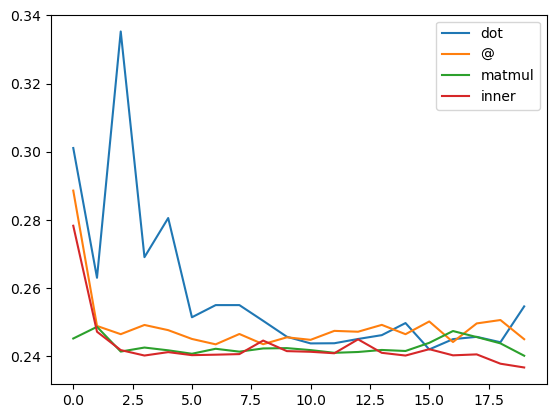

In [4]:
plt.plot(timed_dot,label='dot')
plt.plot(timed_at,label='@')
plt.plot(timed_matmul,label='matmul')
plt.plot(timed_inner,label='inner')
plt.legend()
# plt.ylim(0.02, 0.03)

In [13]:
from functools import partial
from jax import jit, vmap

@jit
@partial(vmap, in_axes=(0,None, None, None))
def f(x, b, c, d):
    a = jnp.ones(10000000)*x
    return a@a

In [14]:
x = jnp.arange(10)

print(f(x, None, None, None))

[0.0000000e+00 1.0000000e+07 4.0000000e+07 8.1864136e+07 1.6000000e+08
 2.7615552e+08 3.2745654e+08 5.5097805e+08 6.4000000e+08 7.8333126e+08]
